In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [20]:
path = "./img1.jpg"
image = cv2.imread(path)

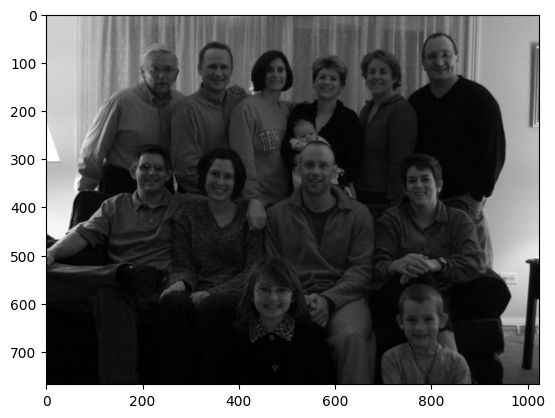

In [21]:
plt.imshow(image)

In [22]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

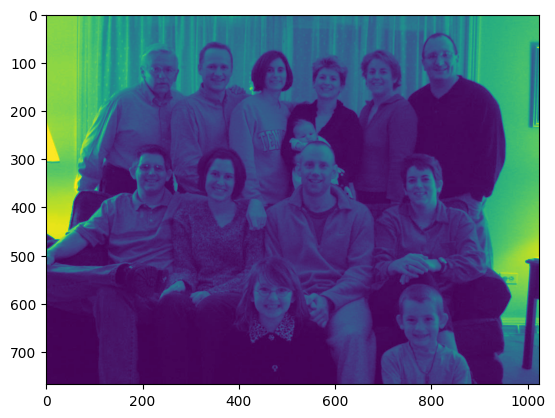

In [23]:
plt.imshow(gray)

In [33]:
def mean_filter(image, kernel_size):
    padded_image = cv2.copyMakeBorder(image,
                                      kernel_size//2, 
                                      kernel_size//2, 
                                      kernel_size//2,
                                      kernel_size//2,
                                      cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            window = padded_image[y:y+kernel_size, x:x+kernel_size]
            mean_value = np.mean(window)
            filtered_image[y, x] = mean_value
    return filtered_image



average_filter = mean_filter(gray, 15)

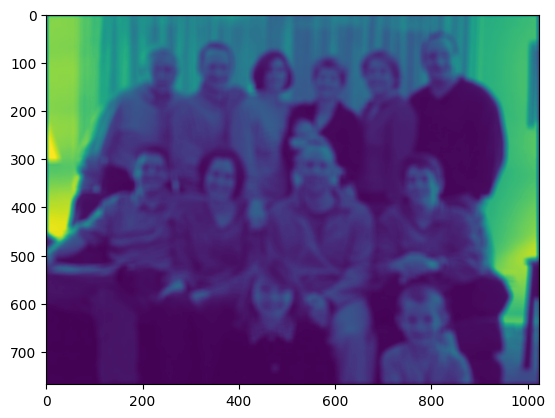

In [34]:
plt.imshow(average_filter)

In [40]:
def mean_filter_weighted(image, kernel_size, weights):
    padded_image = cv2.copyMakeBorder(image,
                                      kernel_size//2, 
                                      kernel_size//2, 
                                      kernel_size//2,
                                      kernel_size//2,
                                      cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            window = padded_image[y:y+kernel_size, x:x+kernel_size]
            for i in range(kernel_size):
                for j in range(kernel_size):
                    window[i][j] *= weights[i][j]
            mean_value = np.mean(window)
            filtered_image[y, x] = mean_value
    return filtered_image

weights = [[1, 3, 1], [1, 9, 1], [1, 2, 1]]
average_weighted_filter = mean_filter_weighted(gray, 3, weights)

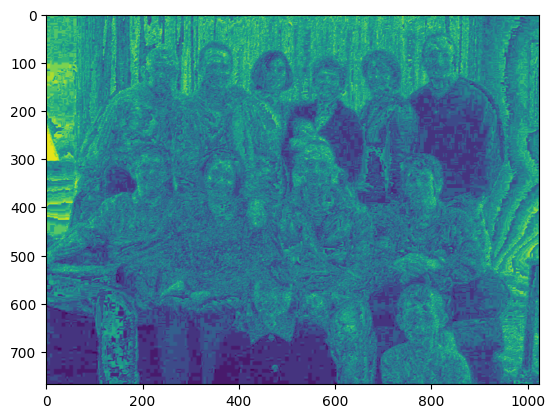

In [42]:
plt.imshow(average_weighted_filter)

In [107]:
def gaussian_kernel(size, sigma):
   size = int(size)
   x, y = np.mgrid[-size:size+1, -size:size+1]
   g = np.exp(-(x**2 + y**2)) / (2* sigma**2)
   return g / g.sum()

kernel_size = 3
gaussian_weights = gaussian_kernel(kernel_size, 4)
gaussian_filter = mean_filter_weighted(gray, kernel_size*2 + 1, gaussian_weights)

(7, 7)

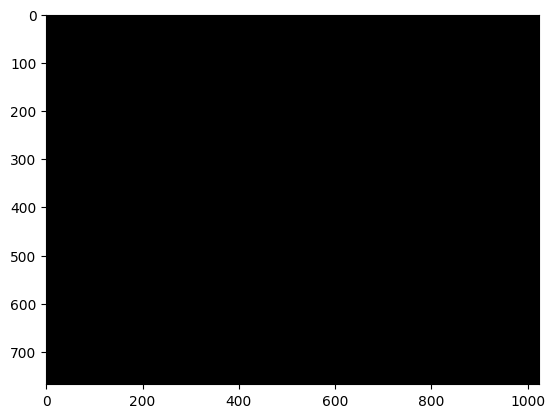

In [109]:
plt.imshow(gaussian_filter, cmap="gray")

In [57]:
def median_filtering(image, kernel_size):
    padded_image = cv2.copyMakeBorder(image,
                                      kernel_size//2, 
                                      kernel_size//2, 
                                      kernel_size//2,
                                      kernel_size//2,
                                      cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            window = padded_image[y:y+kernel_size, x:x+kernel_size]
            window = np.array(window)
            window = window.flatten()
            window = np.sort(window)
            filtered_image[y, x] = window[(kernel_size * kernel_size) // 2]
    return filtered_image


median = median_filtering(gray, 15)

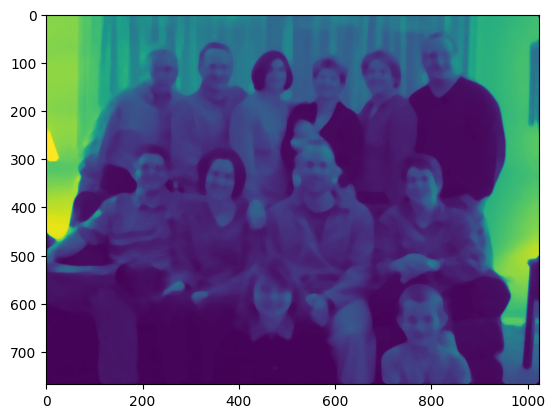

In [59]:
plt.imshow(median)

In [60]:
gray.shape

(768, 1024)

[111  91  98  93 128  94 106 102  99 107  92 102  65 119 127 124  94 110
 108 127]


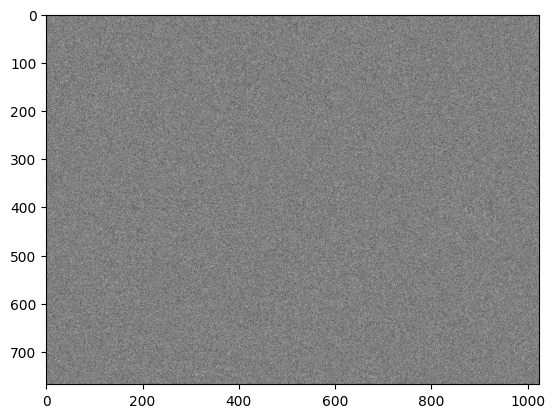

In [82]:

gauss_noise=np.zeros((768,1024),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.8).astype(np.uint8)
noise=cv2.add(gray, gauss_noise)
plt.imshow(gauss_noise, cmap="gray")


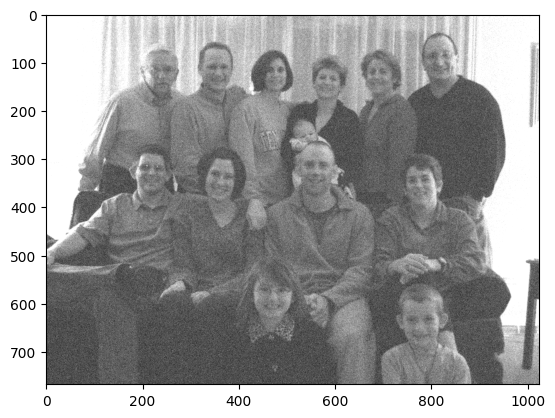

In [77]:
plt.imshow(noise, cmap="gray")


In [70]:
from math import log10, sqrt 
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

In [78]:
aver_fil_3 = mean_filter(noise, 3)
aver_fil_5 = mean_filter(noise, 5)
aver_fil_7 = mean_filter(noise, 7)

psnr_1 = PSNR(gray, aver_fil_3)
psnr_2 = PSNR(gray, aver_fil_5)
psnr_3 = PSNR(gray, aver_fil_7)


In [79]:
psnr_1, psnr_2, psnr_3

(27.5268374133961, 27.51021090092117, 27.491320731569008)

In [80]:
med_fil_3 = median_filtering(noise, 3)
med_fil_5 = median_filtering(noise, 5)
med_fil_7 = median_filtering(noise, 7)

psnr_1 = PSNR(gray, med_fil_3)
psnr_2 = PSNR(gray, med_fil_5)
psnr_3 = PSNR(gray, med_fil_7)


In [81]:
psnr_1, psnr_2, psnr_3

(27.629537549662885, 27.57715462209127, 27.543834680631516)